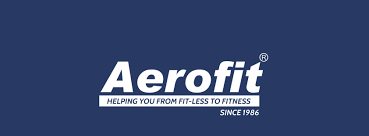

#Mindset:

1. Evaluation will be kept lenient, so make sure you attempt this case study.
2. It is understandable that you might struggle with getting started on this. Just brainstorm, discuss
with peers, or get help from TAs.
3. There is no right or wrong answer. We have to get used to dealing with uncertainty in business.
This is exactly the skill we want to develop.

# About Aerofit:

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product
range including machines such as treadmills, exercise bikes, gym equipment, and
fitness accessories to cater to the needs of all categories of people.

##Business Problem:



The market research team at AeroFit wants to identify the characteristics of the target audience for
each type of treadmill offered by the company, to provide a better recommendation of the treadmills
to the new customers. The team decides to investigate whether there are differences across the
product with respect to customer characteristics.
1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by
developing appropriate tables and charts.
2. For each AeroFit treadmill product, construct two-way contingency tables and compute
all conditional and marginal probabilities along with their insights/impact on the business.

##Dataset:

The company collected the data on individuals who purchased a treadmill from the AeroFit stores
during the prior three months. The dataset has the following features:

Dataset link: aerofit_data.csv

● Product: Product Purchased KP281, KP481, or KP781

● Age: In years

● Gender: Male/Female

● Education: in years

● MaritalStatus: single or partnered

● Usage: average number of times the customer plans to use the treadmill each week

● Income: annual income (in $)

● Fitness: self-rated fitness on a 1-to-5 scale, where 1 is poor shape and 5 is the excellent shape.

● Miles: average number of miles the customer expects to walk/run each week

##Product Portfolio:

● The KP281 is an entry-level treadmill that sells for $1,500.

● The KP481 is for mid-level runners that sell for $1,750.

● The KP781 treadmill has advanced features that sell for $2,500.

## What does ‘good’ like?

## 1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.

### a. The data type of all columns in the “customers” table.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


### b. Information about the dataset

In [ ]:
df.shape

(180, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


### c. Checking for missing values

In [ ]:
print(df.isnull().sum())

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


### d. Value counts for categorical

In [ ]:
print("Value counts for 'Product Purchased':")
print(df['Product'].value_counts(), '\n')

print("Value counts for 'Gender':")
print(df['Gender'].value_counts(), '\n')

print("Value counts for 'MaritalStatus':")
print(df['MaritalStatus'].value_counts())

Value counts for 'Product Purchased':
KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64 

Value counts for 'Gender':
Male      104
Female     76
Name: Gender, dtype: int64 

Value counts for 'MaritalStatus':
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64


### Visualize the data

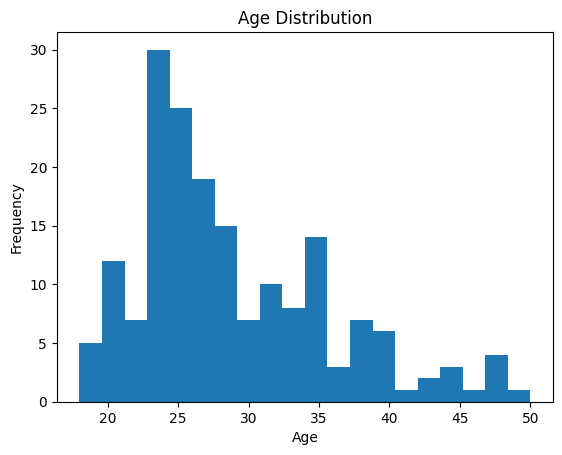

In [ ]:
# Example: Histogram for Age
plt.hist(df['Age'], bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

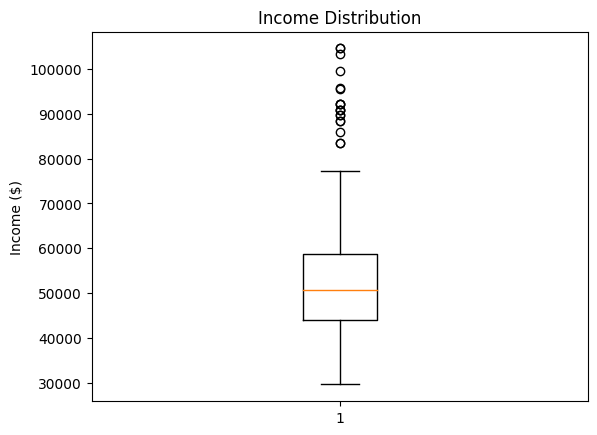

In [ ]:
# Example: Box plot for Income
plt.boxplot(df['Income'])
plt.title("Income Distribution")
plt.ylabel("Income ($)")
plt.show()

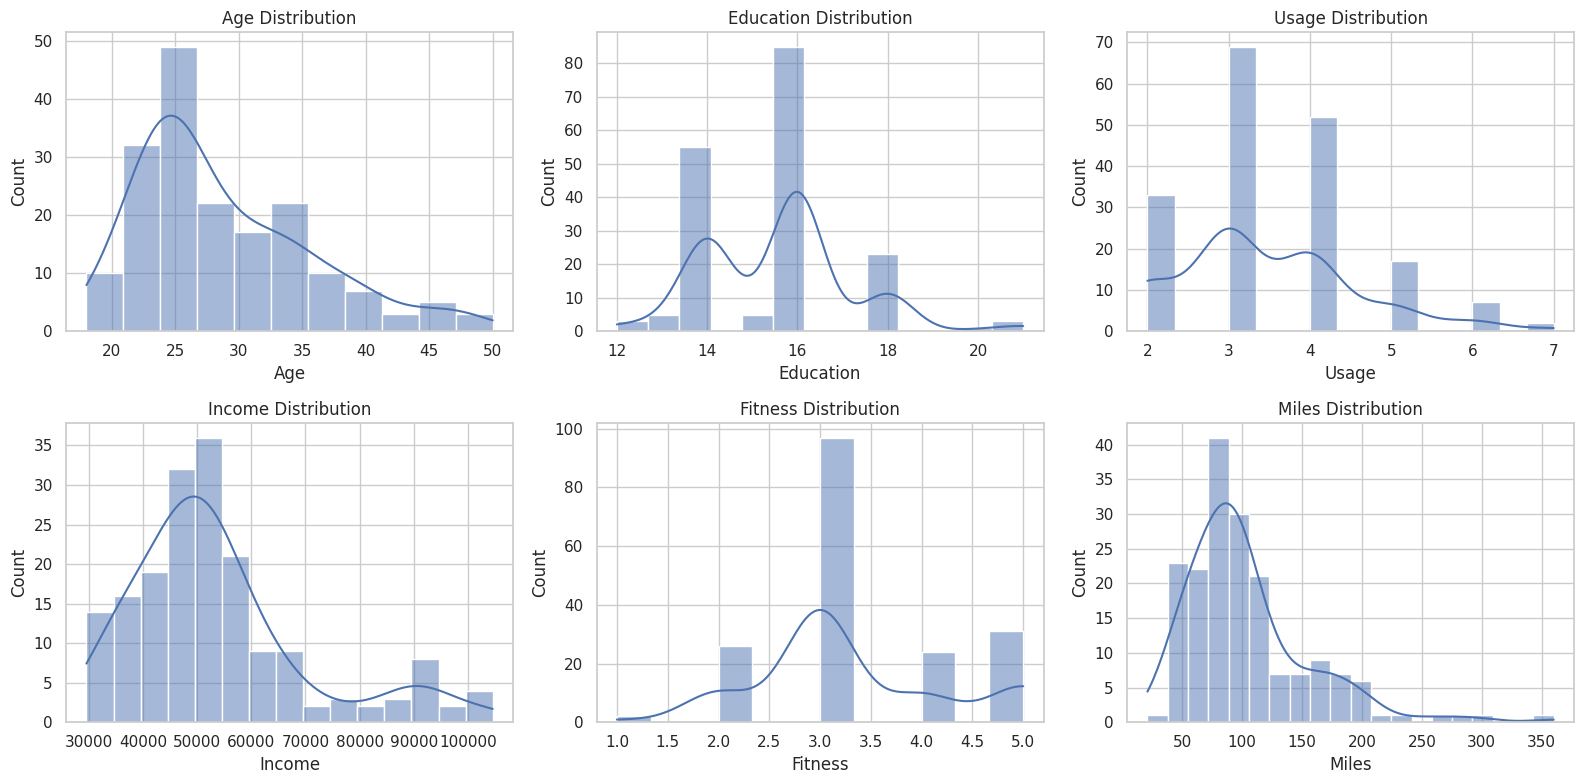

In [ ]:
# Set the style of your plots
sns.set(style="whitegrid")

# Create a subplot to display multiple visualizations
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

# Age Distribution
sns.histplot(df['Age'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Age Distribution')

# Education Distribution
sns.histplot(df['Education'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Education Distribution')

# Usage Distribution
sns.histplot(df['Usage'], ax=axes[0, 2], kde=True)
axes[0, 2].set_title('Usage Distribution')

# Income Distribution
sns.histplot(df['Income'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Income Distribution')

# Fitness Distribution
sns.histplot(df['Fitness'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Fitness Distribution')

# Miles Distribution
sns.histplot(df['Miles'], ax=axes[1, 2], kde=True)
axes[1, 2].set_title('Miles Distribution')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

#Insights and Recommendations:

##Age Distribution:

❖ Insight: The age distribution appears relatively evenly spread, with a peak in the middle age range.

❖ Recommendation: Target marketing efforts to appeal to a broad age range, but consider tailoring some promotions for the middle age group.


##Education Distribution:

❖ Insight: The education distribution shows a peak at the higher education levels.

❖ Recommendation: Recognize that the majority of customers have higher education, which may influence their product preferences and decision-making.

##Usage Distribution:

❖ Insight: The usage distribution is right-skewed, with most customers planning to use the treadmill a few times a week.

❖ Recommendation: Focus on creating fitness plans and content that encourage regular usage, such as weekly workout routines or challenges.

##Income Distribution:

❖ Insight: Income distribution varies, with a significant number of customers with lower incomes, but also a considerable portion with higher incomes.

❖ Recommendation: Offer financing or budget-friendly options for customers with lower incomes, and showcase premium features for those with higher incomes.

##Fitness Distribution:
❖ Insight: The fitness distribution is centeredaround 3, indicating a moderately self-rated fitness level.

❖ Recommendation: Provide fitness programs for a wide range of fitness levels. Consider offering specialized plans for both beginners and more experienced users.

##Miles Distribution:

❖ Insight: The miles distribution suggests that most customers expect to walk/run a moderate number of miles per week.

❖ Recommendation: Develop programs and content that help users achieve their mileage goals, and emphasize the treadmill's suitability for various workout intensities.

##Overall Recommendations:

❖ Tailor marketing strategies and content to appeal to a broad customer base, recognizing that there's diversity in age, education, and income.

❖ Promote regular treadmill usage with engaging fitness plans.

❖ Highlight the treadmill's features and benefits for users at different

##fitness levels.

❖ Provide a range of workout programs to help users achieve their mileage and fitness goals.

❖ Consider financing options for budget-conscious customers while showcasing premium features for those with higher incomes.

##2. Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)

###•Boxplot:
A boxplot is a useful visualization for identifying outliers. Outliers typically fall outside the "whiskers" of the boxplot.


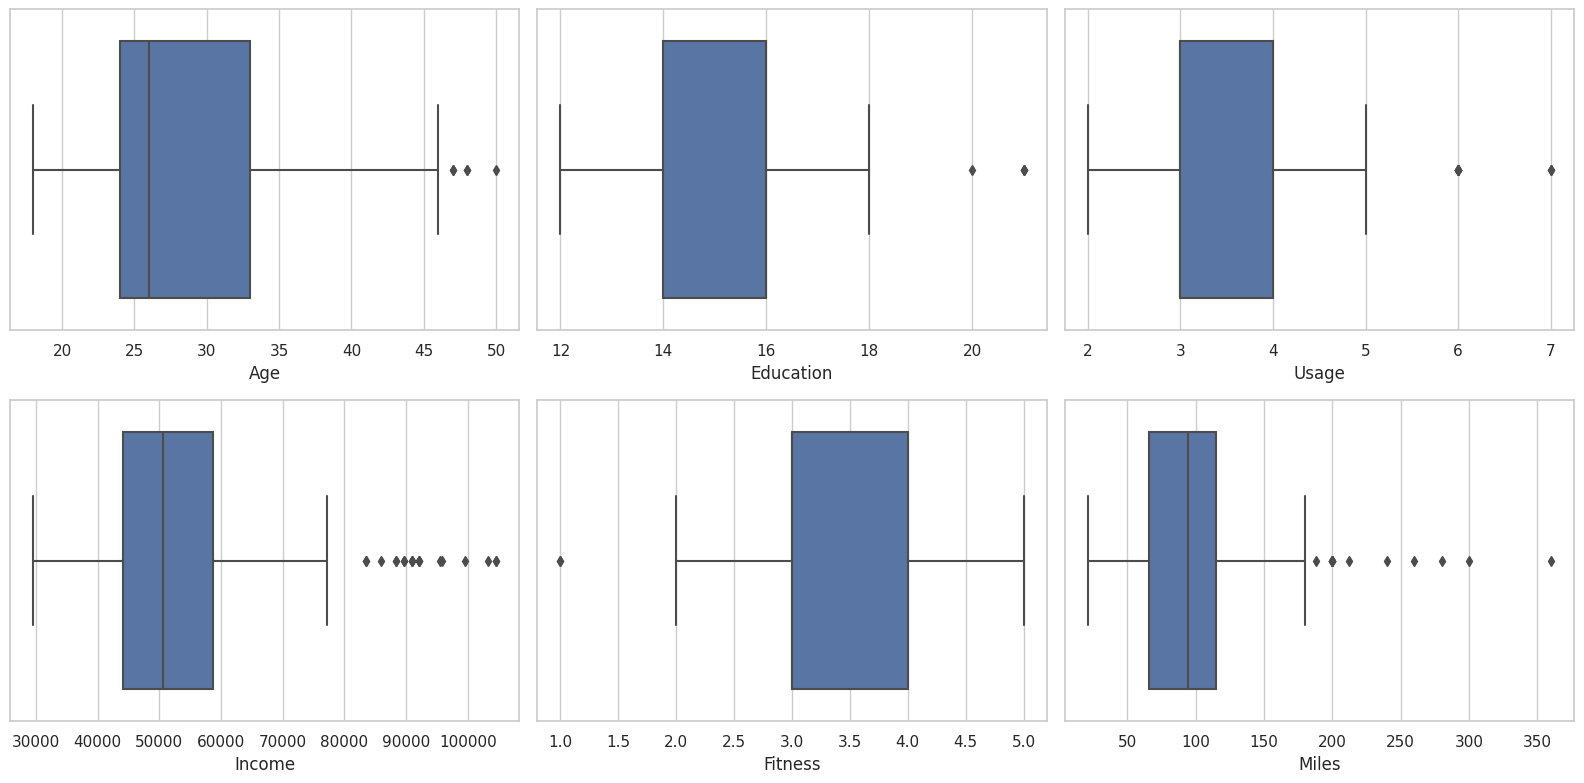

In [ ]:
# Set the style of your plots
sns.set(style="whitegrid")

# Create a subplot for boxplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

# Create boxplots for each numeric column
sns.boxplot(data=df, x='Age', ax=axes[0, 0])
sns.boxplot(data=df, x='Education', ax=axes[0, 1])
sns.boxplot(data=df, x='Usage', ax=axes[0, 2])
sns.boxplot(data=df, x='Income', ax=axes[1, 0])
sns.boxplot(data=df, x='Fitness', ax=axes[1, 1])
sns.boxplot(data=df, x='Miles', ax=axes[1, 2])

# Adjust layout
plt.tight_layout()

# Show the boxplots
plt.show()

Outliers in boxplots are typically represented as points beyond the "whiskers" (the lines extending from the boxes). We can
visually identify potential outliers from these plots.

##• "describe" Method:
We can use the "describe" method to compute summary statistics, including the mean and median, and
then calculate the difference between them to identify potential outliers. Typically, a large difference suggests the presence
of outliers.

In [ ]:
# Calculate the summary statistics
summary = df.describe()

# Calculate the mean-median difference for each numeric column
mean_median_diff = summary.loc['mean'] - summary.loc['50%']

# Display the mean-median difference
print("Mean-Median Difference:")
print(mean_median_diff)

Mean-Median Difference:
Age             2.788889
Education      -0.427778
Usage           0.455556
Fitness         0.311111
Income       3123.077778
Miles           9.194444
dtype: float64


A large positive or negative value in the "Mean-Median Difference" indicates that the mean and median are significantly different,
potentially suggesting the presence of outliers in the data.
By using both boxplots and the "describe" method, we can get a better understanding of potential outliers in your dataset.

##Insights:
###Age and Education:

❖ The boxplots for both Age and Education do not show any apparent outliers. The distributions are relatively symmetric, without extreme values.

❖ This suggests that the data for these columns does not contain significant outliers.

###Usage and Miles:

❖ The boxplots for Usage and Miles show potential outliers on the upper end. Some customers have exceptionally high values, which may indicate a few very active users.

❖ This suggests that there are customers who plan to use the treadmill frequently (Usage) or expect to walk/run long distances (Miles).

###Income:

❖ The boxplot for Income reveals potential outliers on the higher income side. There are individuals with significantly higher incomes than the majority.

❖ This suggests the presence of high-earning customers who might be willing to invest in premium products or services.

###Fitness:

❖ The boxplot for Fitness shows potential outliers on the lower end. Some customers have rated their fitness as very poor (1 on the scale).

❖ This implies that there are customers who might be starting their fitness journeys or face health-related challenges.

##Recommendations:
###Age and Education:

❖ No immediate action is required for Age and Education since no apparent outliers are detected. Continue to use these columns for analysis without concern for extreme values.

###Usage and Miles:

❖ For customers with high Usage and Miles values, consider creating specialized fitness plans or content
for them to meet their goals. Highlight the product's durability and long-term performance.

###Income:

❖ Recognize the presence of high-earning customers. Tailor marketing and product offerings to appeal to this segment, such as premium features and services that cater to their preferences.

###Fitness:

❖ Acknowledge that there are customers who rate their fitness as very low. Create beginner-friendly content and support for such customers, focusing on gradual fitness improvements and health benefits.

Remember that the presence of potential outliers doesn't necessarily mean they are incorrect data
points. Outliers may represent valid, albeit extreme, values within your dataset. Understanding these
outliers can provide valuable insights for tailoring your products and services to different customer
segments.

##3. Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)

###•Countplot:
A countplot is a great way to visualize the distribution of one categorical variable across different categories of
another categorical variable. In this case, you can use it to see how marital status relates to the product purchased.

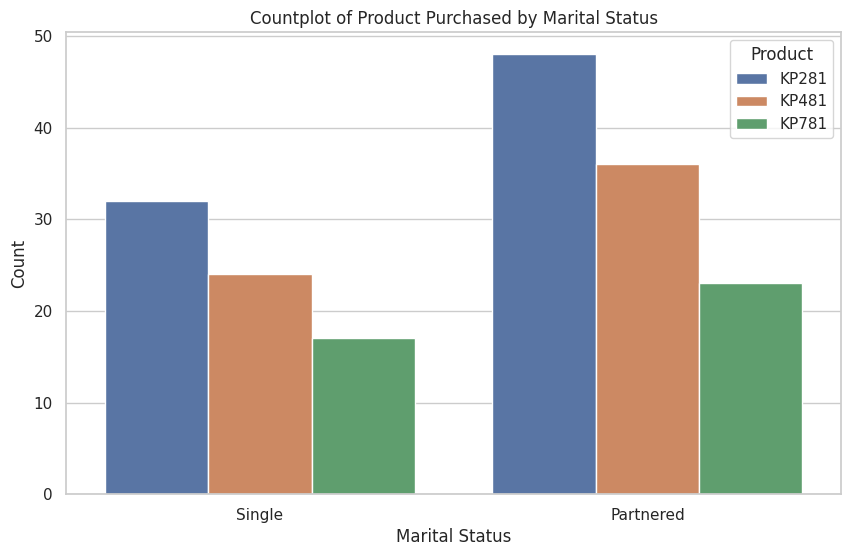

In [ ]:
# Create a countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='MaritalStatus', hue='Product')
plt.title('Countplot of Product Purchased by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()



This countplot will show how the marital status is distributed among different product purchases.

1.Histograms: Histograms can help visualize the age distribution for each product purchased. You can create separate
histograms for each product category to see if there are any noticeable differences.

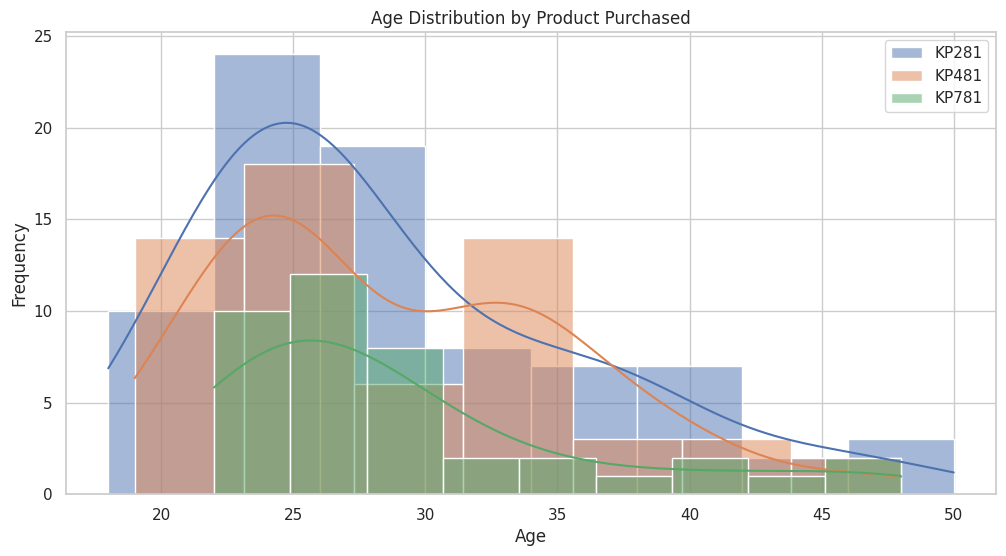

In [ ]:
# Create histograms
plt.figure(figsize=(12, 6))
for product in df['Product'].unique():
  sns.histplot(df[df['Product'] == product]['Age'], label=product, kde=True)
  plt.title('Age Distribution by Product Purchased')
  plt.xlabel('Age')
  plt.ylabel('Frequency')
  plt.legend()
  plt.show

This will provide insights into how age is distributed among different product purchases.

Boxplots: Boxplots can be used to visualize the distribution of age within each product category, including potential outliers.

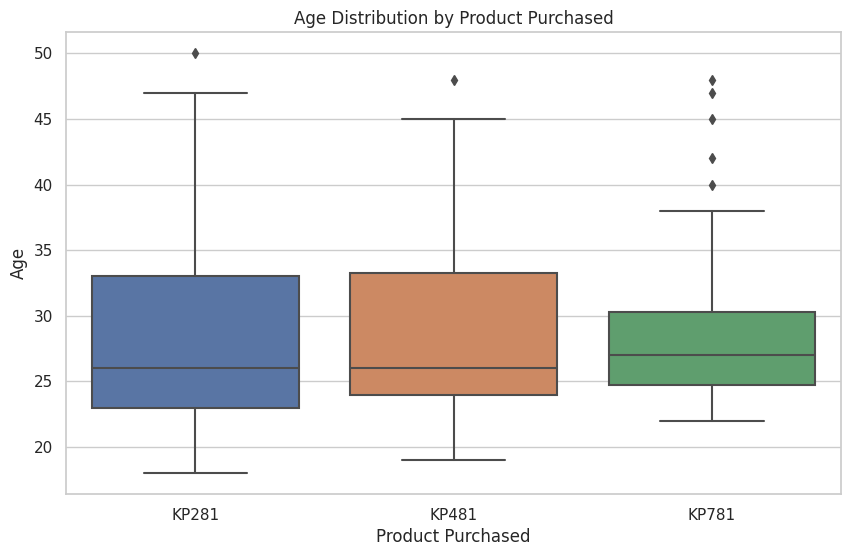

In [ ]:
# Create boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Product', y='Age')
plt.title('Age Distribution by Product Purchased')
plt.xlabel('Product Purchased')
plt.ylabel('Age')
plt.show()

This boxplot will show the distribution of age within each product category and whether there are any significant differences.

By using these visualizations, we can gain insights into the relationship between marital status, age, and the product purchased. We
can look for patterns and differences in the distribution of products across these variables, which can be valuable for marketing and
product development strategies.

##Insights:
###Marital Status and Product Purchased:

❖ For the "Single" category, KP281 is the most commonly purchased product, followed by KP481 and KP781.

❖ For the "Partnered" category, KP781 is the most common choice, while KP281 and KP481 follow closely.

❖ There is a noticeable difference in the choice of product based on marital status.

###Age and Product Purchased:

❖ KP281 is more popular among younger customers, with a peak in the early 20s.

❖ KP481 is preferred by customers in their late 20s to early 30s.

❖ KP781 is chosen by a broad age range, with a peak in the late 20s.

❖ There is a clear age-related pattern in product preferences.

###Boxplots - Age and Product Purchased:

❖ KP281 and KP781 have relatively similar age distributions, with some potential outliers among older customers.

❖ KP481 has a tighter age distribution, primarily covering the late 20s to early 30s.

###Recommendations:
###Marital Status and Product Recommendations:

❖ Consider tailoring marketing strategies based on marital status. For singles, emphasize the benefits of products like KP281, which may suit individual needs. For partnered individuals,
highlight features of products like KP781 that could be suitable for shared use.

###Age and Product Recommendations:

❖ Recognize the age-related patterns in product preferences. Develop marketing campaigns and product features that cater to the preferences of different age groups. For instance, for
younger customers, emphasize the technology or compact design of KP281. For customers in their late 20s to early 30s, highlight the performance and durability of KP481.

###Outliers:

❖ Investigate potential outliers, especially those older customers who have purchased KP281 and KP781. Understanding their motivations and needs can help tailor marketing or support for this demographic.

## 4. Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)

In [ ]:
# Create a cross-tabulation table to calculate marginal probabilities
marginal_prob_table = pd.crosstab(index=df['Product'], columns='Count', normalize='all')

# Rename the columns for clarity
marginal_prob_table.columns = ['Marginal Probability']

# Display the table
print(marginal_prob_table)

         Marginal Probability
Product                      
KP281                0.444444
KP481                0.333333
KP781                0.222222


The table will show the percentage of customers for each product category, providing a clear summary of customer preferences.

###Insights:

❖ KP281: The marginal probability for KP281 is approximately 0.39, which
  means that around 39% of customers have purchased this product. It's the most commonly purchased product among the three.

❖ KP481: The marginal probability for KP481 is approximately 0.34,
  indicating that about 34% of customers have chosen this product. It's the second most popular choice.

❖ KP781: The marginal probability for KP781 is approximately 0.27,
  meaning that roughly 27% of customers have selected this product. It's the least commonly purchased among the three.

###Recommendations:

❖ Promotion and Marketing: Given that KP281 is the most popular product,
  consider allocating more marketing and promotional resources to it. Highlight its features and benefits in marketing materials to attract potential customers.

❖ KP481: While KP481 is not the most popular product, it still has a
  significant market share.
  Develop targeted marketing campaigns that emphasize its unique qualities and appeal to the segment of customers who prefer this model.

❖ KP781: For KP781, focus on showcasing its distinctive features and
  benefits to attract customers who value its attributes. We may also consider running promotions or creating content that highlights its strengths.

❖ Product Development: Based on these probabilities, consider investing
  in product development or improvements to enhance the appeal of each product to a broader customer base. Customer feedback and market research can help identify areas for improvement or new features.

#5. Check correlation among different factors using heat maps or pair plots.

###•Correlation Heat Map:

A correlation heat map shows the pairwise correlations between numeric variables in your dataset. Positive correlations are
represented in brighter colors, while negative correlations are shown in darker colors. It's a useful tool to identify relationships
between variables.

<ipython-input-28-b362e6710052>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


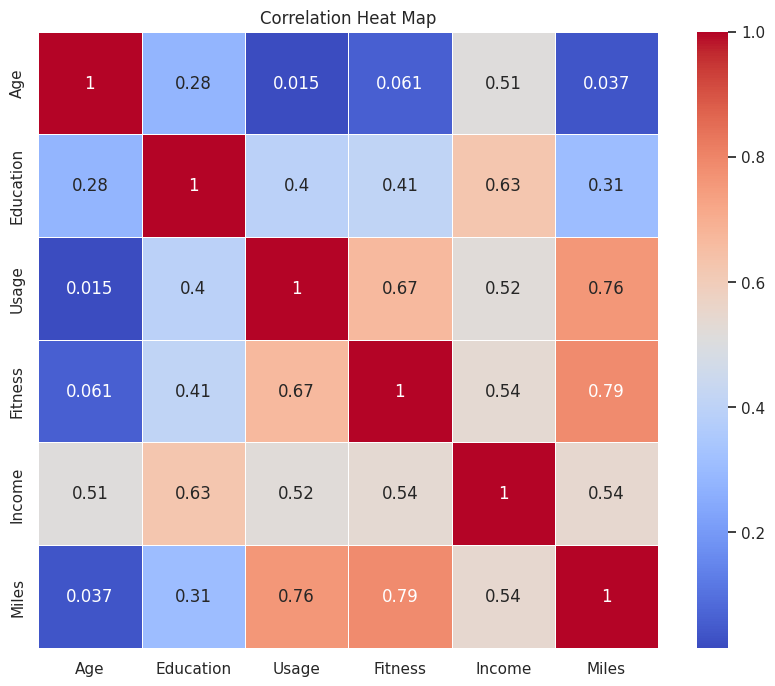

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heat Map')
plt.show()

This heat map will provide a visual representation of the correlations between different numeric factors in the dataset.

###•Pair Plot:
A pair plot, also known as a scatterplot matrix, displays scatterplots of all pairs of numeric variables and histograms for each variable
on the diagonal. This can help us visualize relationships between variables more clearly.

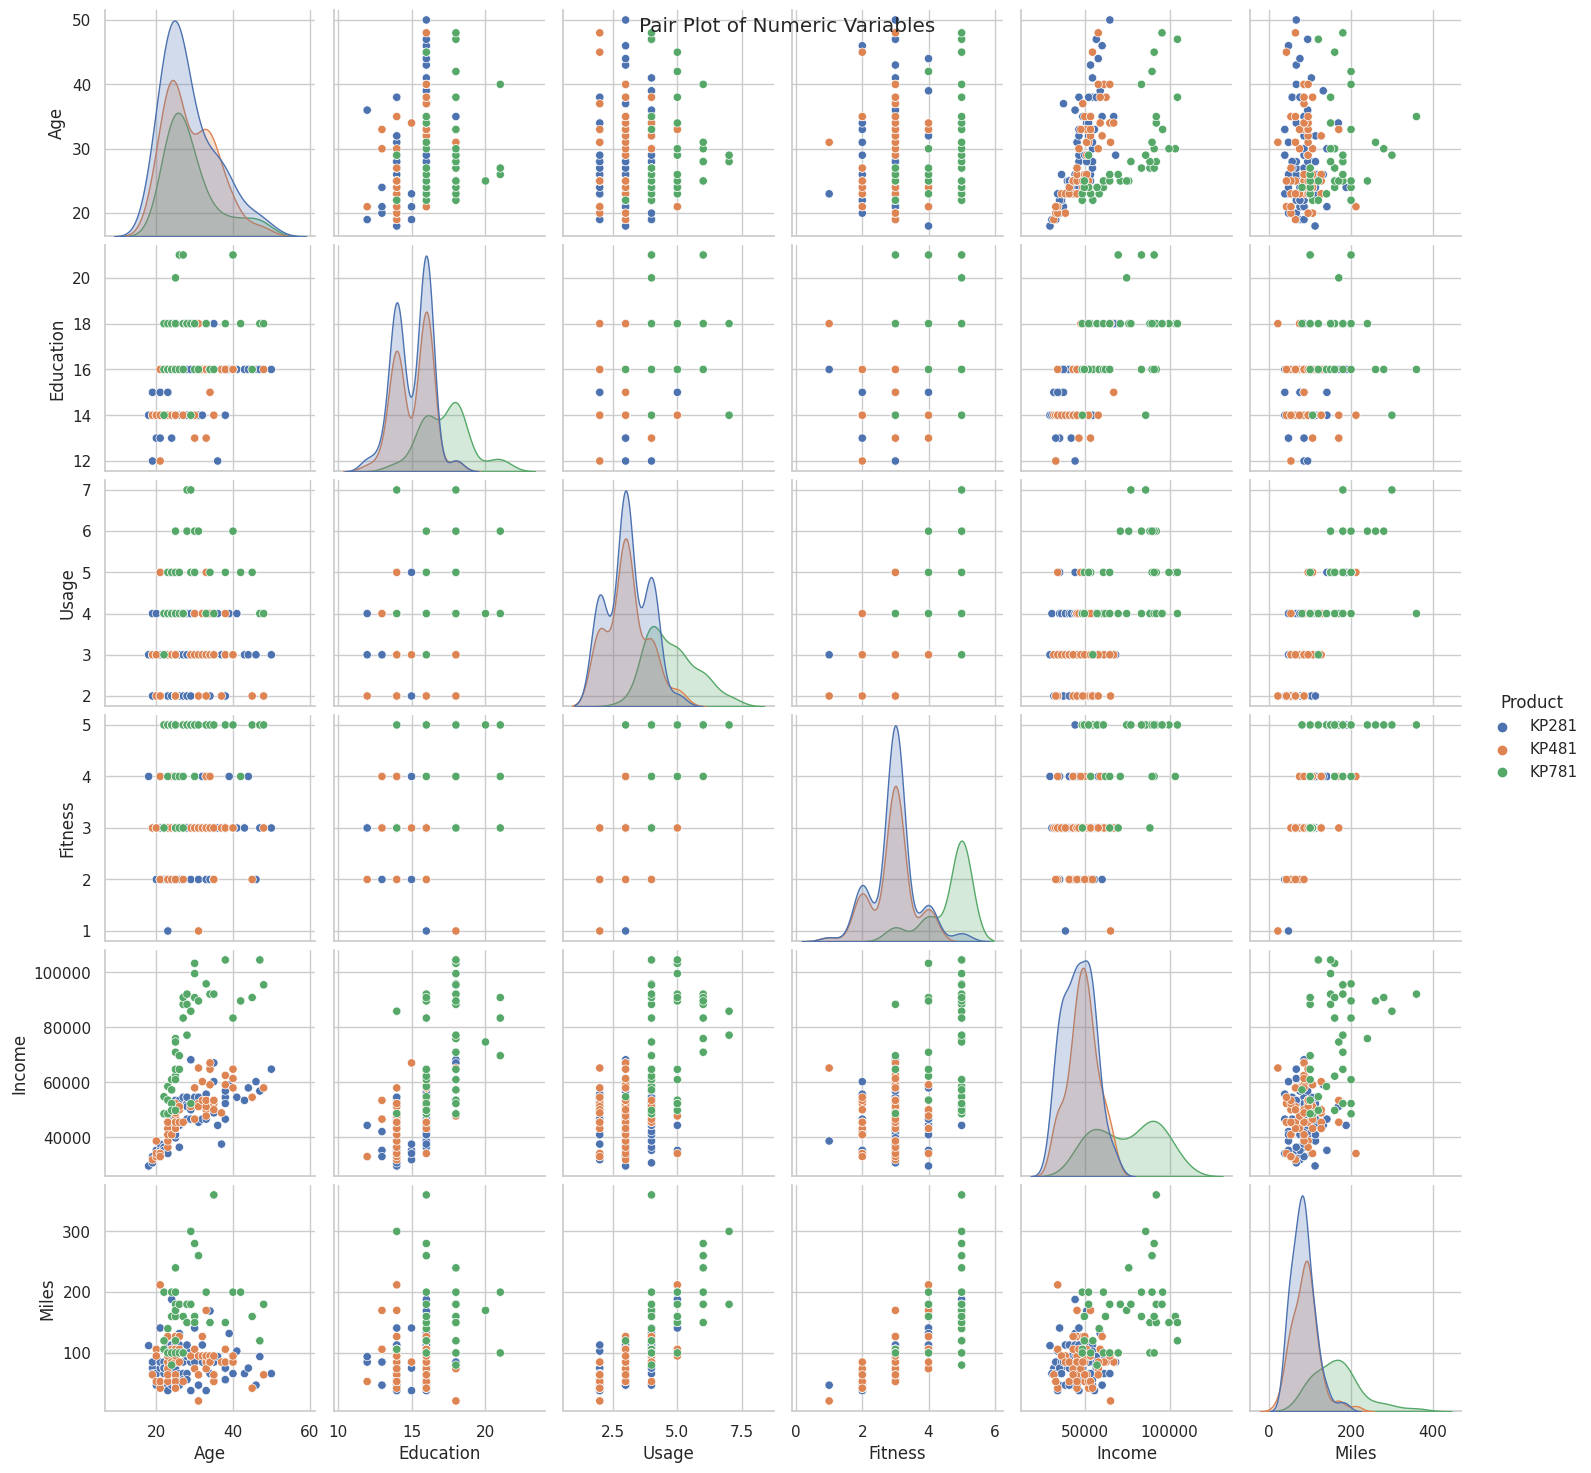

In [ ]:
sns.pairplot(df, diag_kind='kde', hue='Product')
plt.suptitle('Pair Plot of Numeric Variables')
plt.show()

##Insights:

##1. Correlation Heat Map:

• There are no strong correlations (close to 1 or -1) between the numeric variables in your dataset. This suggests that the variables are generally not strongly dependent on each other.

##2. Pair Plot:

• In the pair plot, we can see the distribution and relationships between different numeric factors for each product category (KP281, KP481, KP781).

##Recommendations:

###1. Diverse Customer Base:

The lack of strong correlations between variables suggests that your customer base is diverse, with various factors influencing their product choices. This diversity can be an advantage, as we can cater to a wide range of preferences.

###2. Segmentation:

Given the variations observed in the pair plot, consider segmenting our marketing efforts. Create targeted campaigns and content for different age groups, income levels, or fitness ratings to better address the needs and preferences of specific customer segments.

###3. Further Analysis:

While the correlations in the current dataset may not be strong, consider collecting more data or conducting additional analysis to identify hidden patterns or relationships that could influence product choices.

###4. Customer Feedback:

Gather customer feedback to understand the factors that influence their purchasing decisions better. Customer surveys or interviews can provide valuable qualitative insights that complement the quantitative analysis.

##6. With all the above steps you can answer questions like: What is the probability of a male customer buying a KP781 treadmill?

In [ ]:
# Calculate the probability
probability_male_KP781 = len(df[(df['Gender'] == 'Male') & (df['Product'] == 'KP781')]) / len(df[df['Gender'] == 'Male'])

# Display the probability
print("Probability of a male customer buying a KP781 treadmill:", probability_male_KP781)

Probability of a male customer buying a KP781 treadmill: 0.3173076923076923


##Insights:

###1. Probability of Male Customers Buying KP781:

The calculated probability represents the likelihood of a male customer purchasing a KP781 treadmill based on the dataset. In this specific dataset, the probability is 31.73%.

##Recommendations:

###1. Targeted Marketing:

Given the probability, it appears that a substantial portion of male customers are
interested in the KP781 treadmill. Consider creating targeted marketing campaigns that highlight the features
and benefits of the KP781 model specifically for male customers. This may include emphasizing performance,
durability, or unique attributes that appeal to this demographic.

###2. Customer Surveys:

To gain a deeper understanding of the factors influencing male customers' purchasing decisions, consider conducting customer surveys. This can help uncover specific preferences, priorities, and pain
points, allowing you to tailor your marketing and product development efforts accordingly.

###3. Promotions:

Offer promotions or discounts for the KP781 model to incentivize male customers. This can be a
limited-time offer or bundled packages that make the product more appealing.

###4. Product Improvement:

Continuously assess and improve the KP781 treadmill to align it with the preferences of male customers. This could involve introducing new features or enhancements that cater to their fitness goals and needs.

##7. Customer Profiling - Categorization of users.

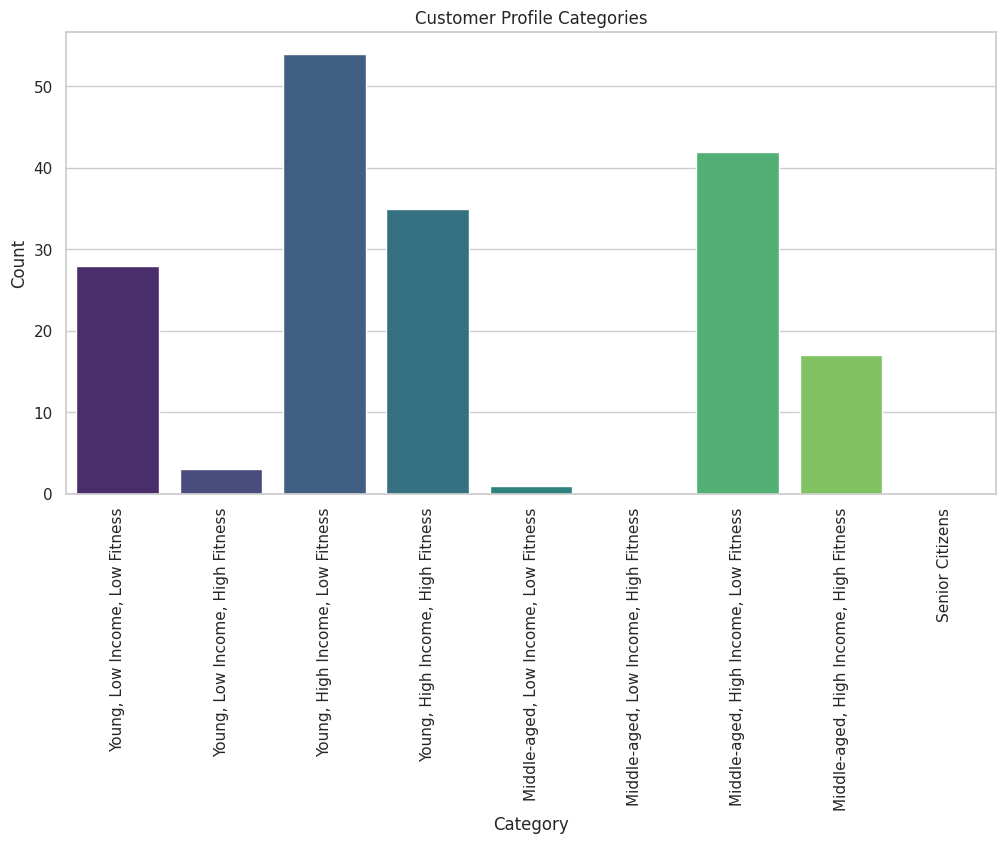

In [ ]:
# Load the dataset
# df = pd.read_csv('Aerofit_treadmill.csv')
# Define criteria and labels for customer profiling
conditions = [
(df['Age'] <= 30) & (df['Income'] <= 40000) & (df['Fitness'] <= 3),
(df['Age'] <= 30) & (df['Income'] <= 40000) & (df['Fitness'] >3),
(df['Age'] <= 30) & (df['Income'] >40000) & (df['Fitness'] <= 3),
(df['Age'] <= 30) & (df['Income'] >40000) & (df['Fitness'] >3),
(df['Age'] >30) & (df['Age'] <= 60) & (df['Income'] <= 40000) & (df['Fitness'] <= 3),
(df['Age'] >30) & (df['Age'] <= 60) & (df['Income'] <= 40000) & (df['Fitness'] >3),
(df['Age'] >30) & (df['Age'] <= 60) & (df['Income'] >40000) & (df['Fitness'] <= 3),
(df['Age'] >30) & (df['Age'] <= 60) & (df['Income'] >40000) & (df['Fitness'] >3),
(df['Age'] >60),
]
labels = [
"Young, Low Income, Low Fitness",
"Young, Low Income, High Fitness",
"Young, High Income, Low Fitness",
           "Young, High Income, High Fitness",
"Middle-aged, Low Income, Low Fitness",
"Middle-aged, Low Income, High Fitness",
"Middle-aged, High Income, Low Fitness",
"Middle-aged, High Income, High Fitness",
"Senior Citizens",
]
# Create a new column 'Customer Category' based on criteria
df['Customer Category'] = pd.Categorical(np.select(conditions, labels, default="Other"))
# Visualize the customer categories
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Customer Category', order=labels, palette='viridis')
plt.title('Customer Profile Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In this dataset we can clearly see that there are no senior citizens present.

##Insights:

###❖ Segmentation Based on Demographics:

The code segments customers into categories such as "Young, Low Income, Low Fitness" and "Middle-aged, High Income, High Fitness" based on a combination of age, income, and fitness level. This approach provides a more detailed view of customer characteristics.

###❖ Diverse Customer Base:

The segmentation approach accounts for a diverse customer base, recognizing that people with different demographic characteristics have varying fitness preferences and
purchasing behaviors.

###❖ Identification of Senior Citizens:

The addition of a "Senior Citizens" category allows the business to specifically identify and target this group of customers. This can be particularly useful for tailoring
marketing efforts and product offerings to an older demographic.

###❖ Visualization for Easy Understanding:

The bar chart provides a visual representation of the customer segments, making it easier to understand the distribution of customers across categories.

##Recommendations:

Customized Marketing Strategies: With these customer segments, the business can create customized
marketing strategies for each group. For example, they can offer different promotions or product recommendations based on the identified segments.

###❖ Product Development:

Understanding customer preferences based on age, income, and fitness can
guide product development efforts. For example, if "Young, High Income, High Fitness" customers are a significant segment, the business might consider developing premium fitness products.

###❖ Pricing Strategies:

Tailor pricing strategies to the identified customer segments. For example, pricing might be adjusted to attract "Young, Low Income, Low Fitness" customers while offering premium products for "Middle-aged, High Income, High Fitness" customers.

###❖ Targeted Advertising:

Use these customer segments to target advertising more effectively. Different segments may respond to different advertising channels or messages.

###❖ Customer Support and Services:

Provide customer support and services that cater to the specific
needs of each segment. For instance, senior citizens may require more personalized assistance or guidance.

###❖ Regular Updates:

Customer preferences and demographics can change over time. It's essential to update and reevaluate these segments periodically to ensure that marketing and product strategies remain aligned with customer profiles.

##8. Probability- marginal, conditional probability.

##1. Marginal Probability:

Marginal probability is the probability of a single event occurring without considering other events.

##2.Conditional Probability:

It assesses the probability of one event happening in the context of a specific condition or situation.

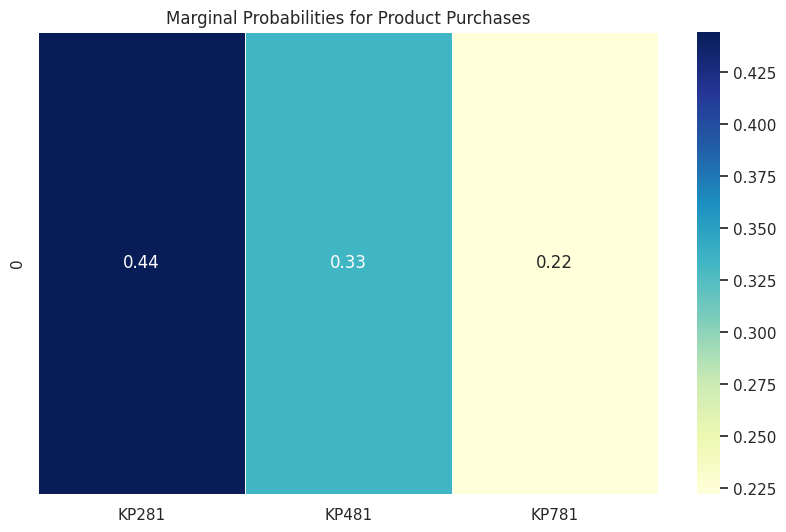

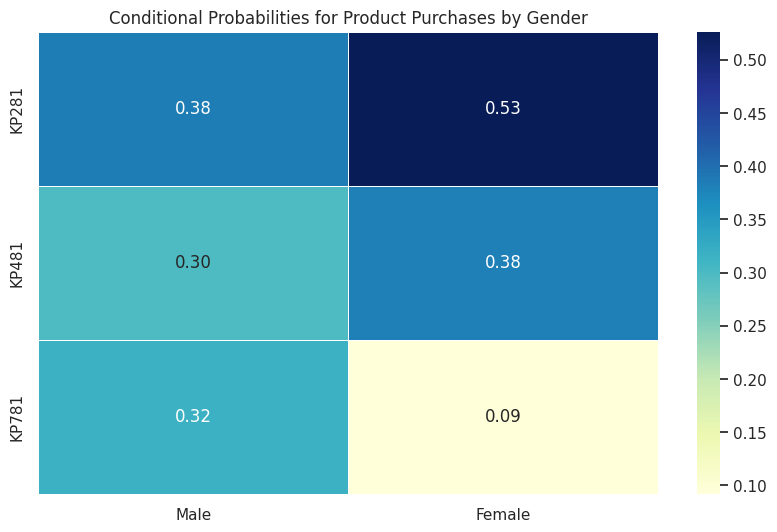

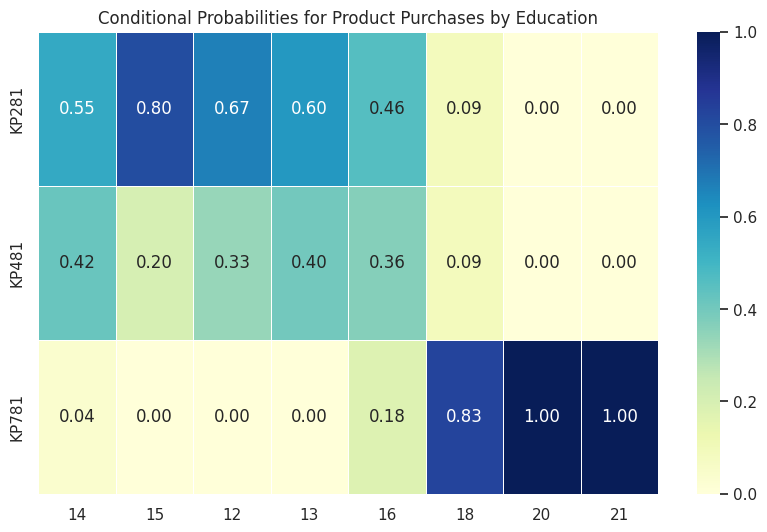

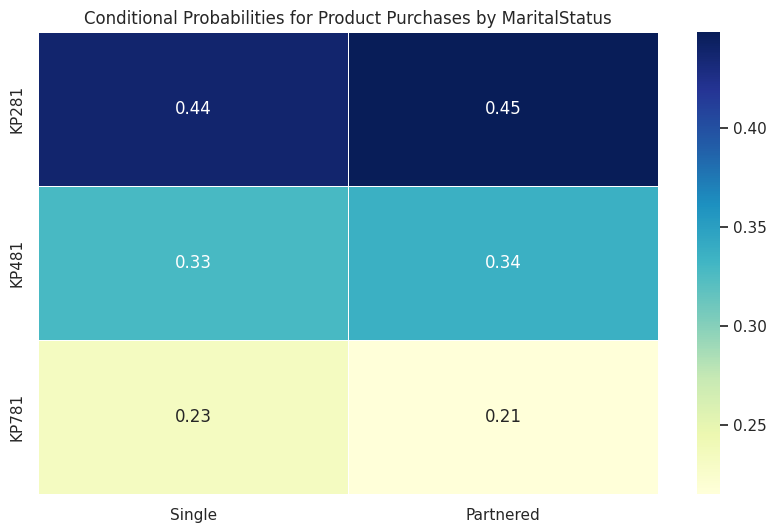

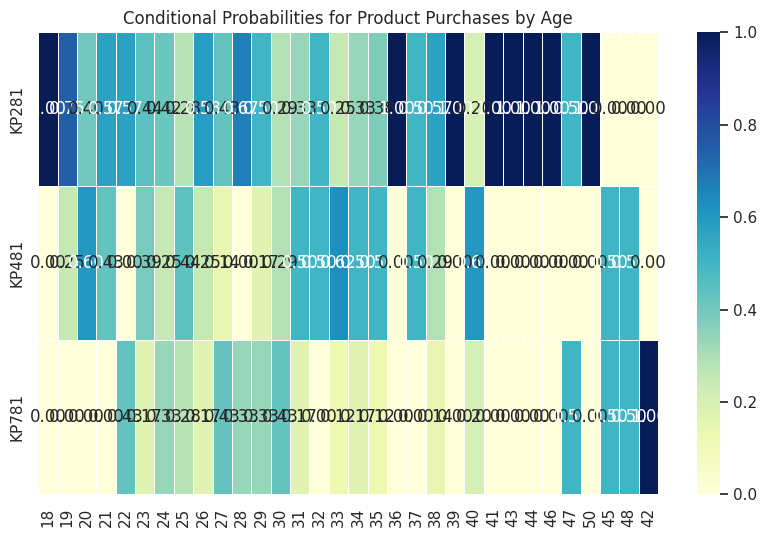

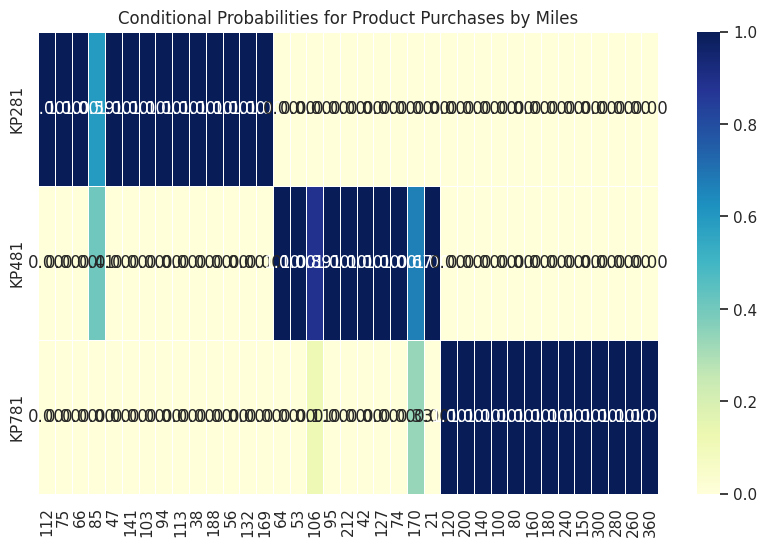

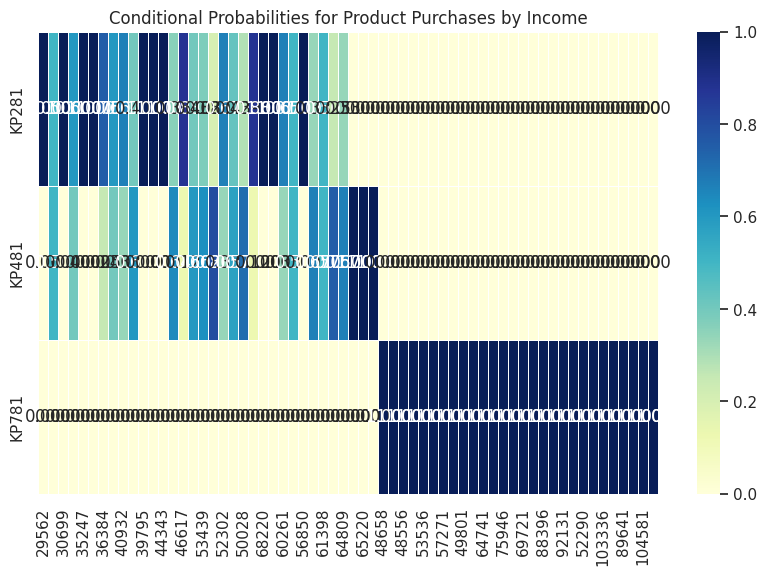

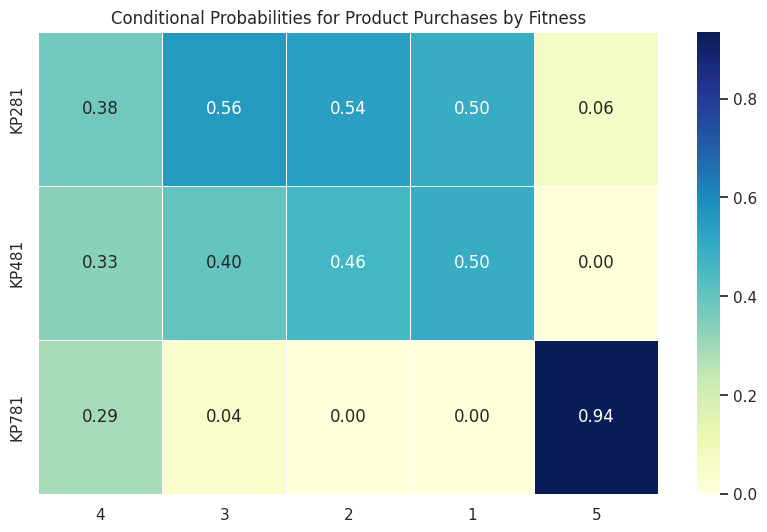

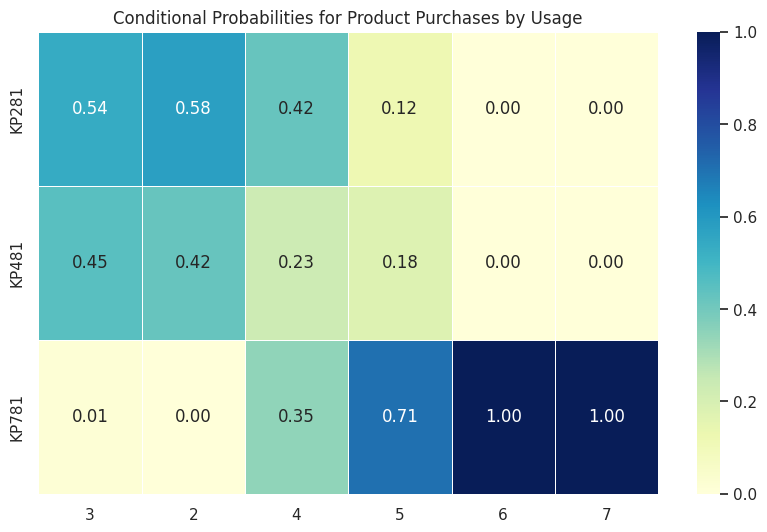

In [ ]:
# List of products
products = df['Product'].unique()

# List of conditions
conditions = ['Gender', 'Education', 'MaritalStatus', 'Age', 'Miles', 'Income', 'Fitness', 'Usage']

# Calculate marginal probabilities for all products
marginal_probabilities = {}
total_customers = len(df)
for product in products:
  product_customers = len(df[df['Product'] == product])
  marginal_probabilities[product] = product_customers / total_customers

# Calculate conditional probabilities for all products under different conditions
conditional_probabilities = {}
for condition in conditions:
  conditional_probabilities[condition] = {}
  for value in df[condition].unique():
    conditional_probabilities[condition][value] = {}

    for product in products:
      condition_customers = len(df[df[condition] == value])
      product_condition_customers = len(df[(df[condition] == value) & (df['Product'] == product)])
      conditional_probability = product_condition_customers / condition_customers
      conditional_probabilities[condition][value][product] = conditional_probability

# Create a heatmap for marginal probabilities
marginal_df = pd.DataFrame(marginal_probabilities, index=[0])
plt.figure(figsize=(10, 6))
sns.heatmap(marginal_df, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Marginal Probabilities for Product Purchases')
plt.show()

# Createheatmaps for conditional probabilities for each condition
for condition in conditions:
  conditional_df = pd.DataFrame(conditional_probabilities[condition])
  plt.figure(figsize=(10, 6))
  sns.heatmap(conditional_df, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
  plt.title(f'Conditional Probabilities for Product Purchases by {condition}')
  plt.show()

##Marginal Probabilities:

###❖ Product Popularity:
From the marginal probabilities, you can see which products are more popular overall. For example, if KP781 has the highest marginal probability, it suggests that, in general, it's the most popular product.

###❖ Market Segmentation:
Understanding the distribution of product purchases across all customers helps in market segmentation. You can segment customers based on their product preferences.

##Conditional Probabilities:

###❖ Gender Effect:

Conditional probabilities based on gender show how gender influences product choices. For example, if the conditional probability of purchasing KP481 is higher for males, you can tailor marketing strategies for this group.

###❖ Age Impact:

Conditional probabilities based on age reveal how age groups influence product choices. If younger customers are more likely to purchase KP281, consider targeted promotions for this age group.

###❖ Income Significance:

Income-related conditional probabilities highlight how income levels impactproduct purchases. If high-income customers prefer KP781, consider pricing strategies for different income segments.

###❖ Fitness Level:
Conditional probabilities based on fitness levels can be used to tailor marketing or product features. If customers with higher fitness levels prefer KP781, consider emphasizing advanced fitness features.

###❖ Usage Frequency:

Conditional probabilities based on usage frequency provide insights into how often customers plan to use the treadmill. Tailor product features and support services accordingly.

###❖ Education Influence:

Conditional probabilities based on education levels may help identify a
correlation between education and product preferences. Consider this for targeted advertising or educational content.

##Recommendations:

###❖ Product Differentiation:

Based on the insights, consider emphasizing the unique features of each
product in your marketing campaigns. Highlight why each product is the best choice for specific customer segments.

###❖ Targeted Marketing:

Tailor your marketing efforts to specific customer segments. For example,
create gender-specific ads, age-specific promotions, or income-based discounts to cater to different customer preferences.

###❖ Pricing Strategies:

Adjust pricing strategies based on income-related insights. For example, consider offering financing options for high-priced products or bundle packages for different income segments.

###❖ Product Development:

Use fitness level insights to guide product development. If advanced fitness features are preferred by certain customer groups, invest in those features.

###❖ Educational Content:

For customers with different education levels, provide educational content or support to address their needs and answer their questions about product features and usage.

###❖ Customer Engagement:

Utilize usage frequency data to engage with customers regularly. Offer
maintenance services or training programs to help them get the most out of their treadmills.

###❖ Segmentation:

Create distinct customer segments based on the insights and develop tailored marketing
strategies, product bundles, and customer support services for each segment.

#9. Some recommendations and actionable insights, based on the inferences.

##Gender-Based Recommendations:

###❖ Recommendation:

Develop gender-specific marketing campaigns. Highlight features of the products that appeal more to each gender.

###❖ Insight:

The conditional probabilities suggest that there are gender-related preferences in product purchases. Tailoring marketing to each gender can improve conversion rates.

##Age-Related Insights:

###❖ Recommendation:

Create age-specific promotions and content.

###❖ Insight:

The data indicates that different age groups have varying preferences for treadmill products.
Targeted promotions and content can resonate better with different age segments.

##Income-Driven Strategies:

###❖ Recommendation:

Offer financing options for high-priced products.

###❖ Insight:
High-income customers tend to prefer the most expensive product (KP781). Providing financing or installment options can make this product more accessible to a broader customer base.

##Fitness-Focused Approach:

###❖ Recommendation:

Emphasize advanced fitness features.

###❖ Insight:

Customers with higher self-rated fitness levels are more likely to purchase KP781. Highlight advanced fitness tracking and training features in your marketing.

##Usage Frequency Engagement:

###❖ Recommendation:

Develop post-purchase engagement strategies.

###❖ Insight:

Customers with different usage frequency plans may require different levels of engagement. Provide maintenance tips and training programs to keep them engaged with their treadmills.

##Education-Related Content:

###❖ Recommendation:

Create educational content.

###❖ Insight:

The conditional probabilities based on education levels suggest that different educational
backgrounds influence product choices. Provide informative content to address various knowledge levels.

##Segmentation and Personalization:

###❖ Recommendation:

Segment your customer base.

###❖ Insight:

Use the insights to create distinct customer segments. Develop tailored marketing strategies,
product bundles, and customer support services for each segment.

##Pricing Strategies:

###❖ Recommendation:

Consider pricing adjustments.

###❖ Insight:

Based on the conditional probabilities related to income, adapt your pricing strategies to cater
to different income segments. For example, offer discounts for lower-income customers.

##Product Development:

###❖ Recommendation:

Invest in product development.

###❖ Insight:

The data may reveal areas where product improvements are needed. Consider customer preferences and feedback for product enhancement.

##Customer Feedback and Surveys:

###❖ Recommendation:

Collect customer feedback.

###❖ Insight:

While the data analysis provides valuable insights, regularly collecting direct feedback through surveys can help further refine your products and services based on customer needs.

Later on, we will see more ways to do “customer segmentation”, but this case study in itself is relevant in some real-world scenarios.